# Shivank Gupta
# TSF task3

# To explore unsupervised learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:

data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.shape

(150, 6)

In [6]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

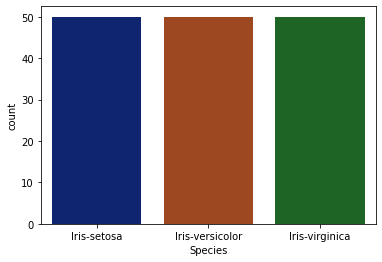

In [7]:
sns.countplot(data['Species'],palette='dark')

# Univariate analysis

Text(0.5, 1.0, 'Sepal length variation variation')

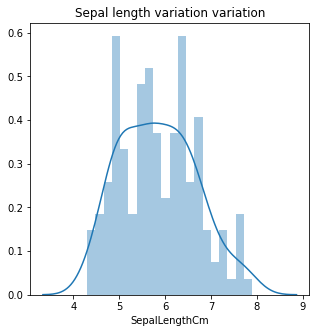

In [8]:
plt.figure(figsize=(5,5))
sns.distplot(data['SepalLengthCm'],kde=True,bins=20)
plt.title("Sepal length variation variation")

Text(0.5, 1.0, 'Sepal width variation variation')

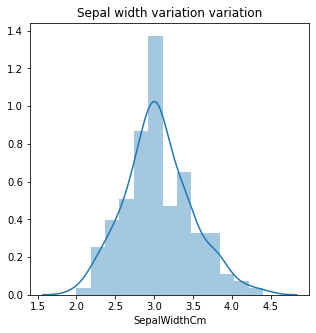

In [9]:
plt.figure(figsize=(5,5))
sns.distplot(data['SepalWidthCm'])
plt.title("Sepal width variation variation")

Text(0.5, 1.0, 'Petal length variation variation')

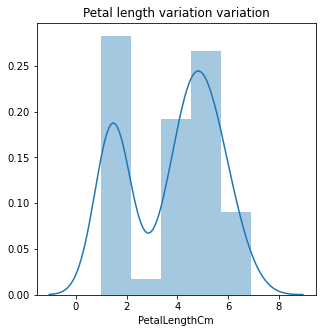

In [10]:
plt.figure(figsize=(5,5))
sns.distplot(data['PetalLengthCm'])
plt.title("Petal length variation variation")

Text(0.5, 1.0, 'Petal width variation variation')

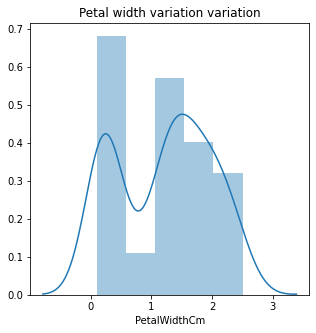

In [11]:
plt.figure(figsize=(5,5))
sns.distplot(data['PetalWidthCm'])
plt.title("Petal width variation variation")

# Bivariate analysis

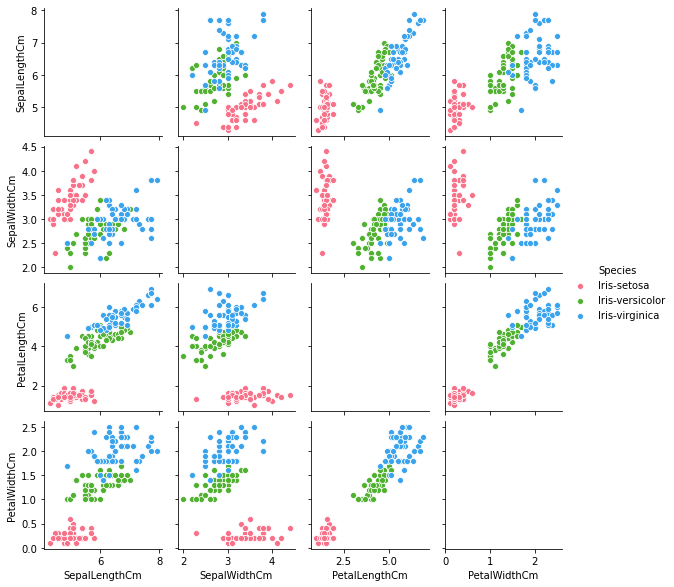

In [12]:
sns.pairplot(data.drop('Id',axis=1),hue="Species", palette='husl', height=2, diag_kind='scatter')

In [13]:
corr=data.drop("Id",axis=1).corr(method='pearson')
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

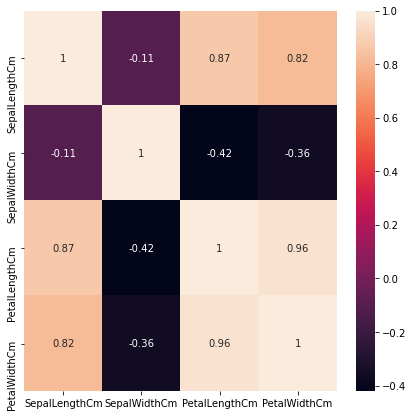

In [14]:
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True)

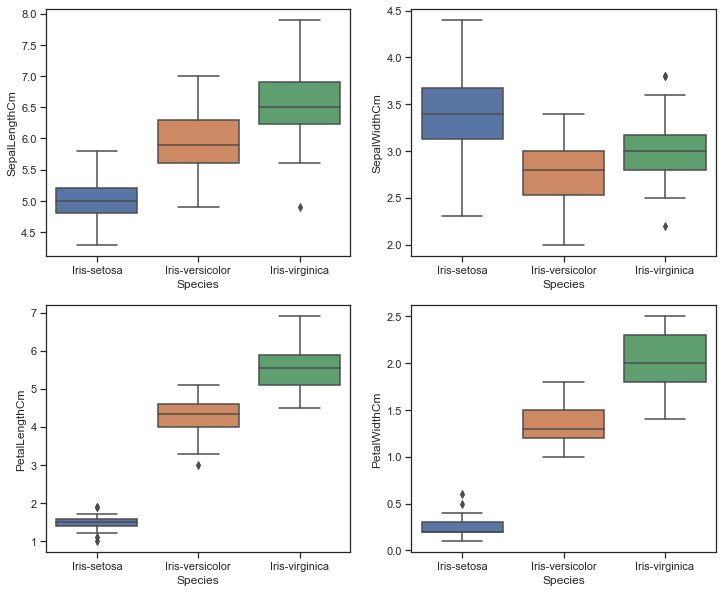

In [15]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=data)
plt.show()

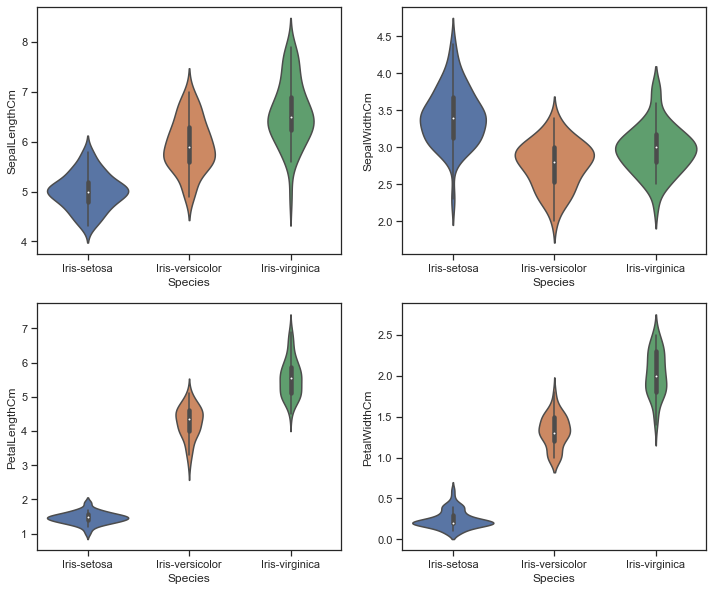

In [16]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.show()

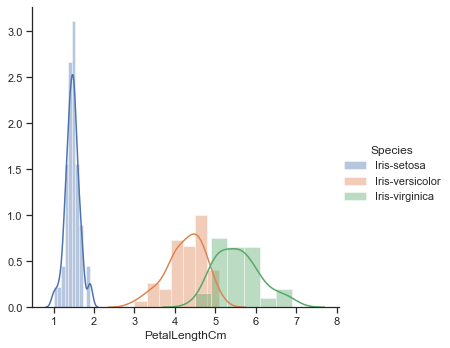

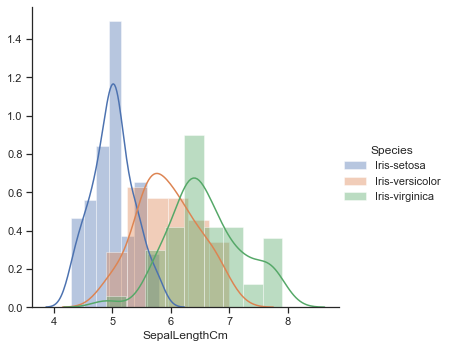

In [17]:
sns.FacetGrid(data, hue="Species", height=5).map(sns.distplot, "PetalLengthCm").add_legend()
sns.FacetGrid(data, hue="Species", height=5).map(sns.distplot, "SepalLengthCm").add_legend()

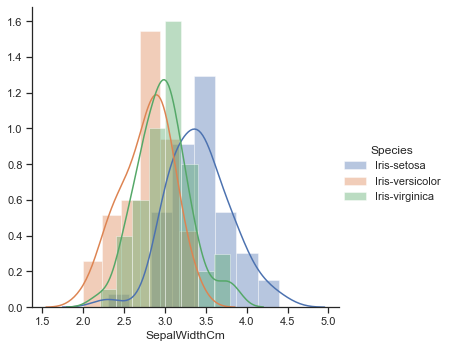

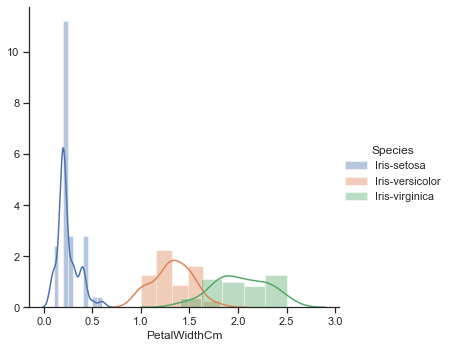

In [18]:
sns.FacetGrid(data, hue="Species", height=5).map(sns.distplot, "SepalWidthCm").add_legend()
sns.FacetGrid(data, hue="Species", height=5).map(sns.distplot, "PetalWidthCm").add_legend()

# Model Training

In [19]:
X = data.iloc[:,1:5].values

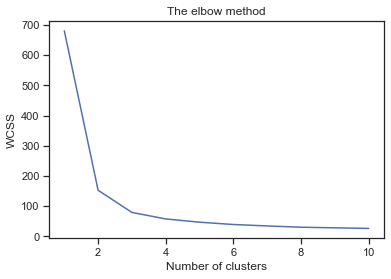

In [20]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

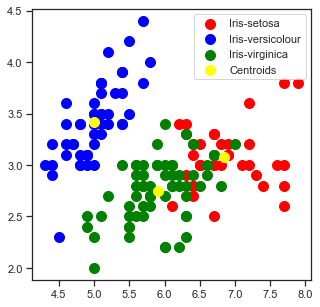

In [22]:
plt.figure(figsize=(5,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()